<a href="https://colab.research.google.com/github/jain-ze/machine-learning/blob/main/DL_W04_FastOptimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fast Optimizers 更快速優化法**

In [ ]:
#引入需要的Liberary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
#輸出 tensorflow.keras.optimizers 模組中所有不以底線開頭的名稱列表
[name for name in dir(keras.optimizers) if not name.startswith('_')]

['Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'Ftrl',
 'Lamb',
 'Lion',
 'LossScaleOptimizer',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 'deserialize',
 'get',
 'legacy',
 'schedules',
 'serialize']

#**Momentum Optimization 動量優化法**

**什麼是動量優化法？**(Momentum Optimization)

動量優化法是一種在梯度下降 (Gradient Descent) 基礎上進行改進的優化演算法。它主要用於加速機器學習模型的訓練過程，特別是在訓練深度神經網路時。其核心思想是在更新模型參數時，考慮到之前的梯度方向，就像一個滾下山坡的球一樣，會因為慣性而加速前進。

**為什麼需要動量優化法？**

在標準的梯度下降中，參數的更新僅僅依賴於當前位置的梯度方向。這可能會導致以下問題：

1.   **收斂速度慢：** 如果損失函數的形狀像一個狹長的峽谷，梯度下降可能會在峽谷的兩邊來回震盪，導致收斂速度非常慢。
容易陷入局部最小值： 在複雜的損失函數地形中，梯度下降可能會陷入一個局部最小值點，而無法找到全局最小值。
2.  **對學習率敏感：** 學習率設置過高可能會導致震盪，過低則收斂過慢。
動量優化法通過引入一個“動量”項來解決這些問題。

**動量優化法的工作原理：**

動量優化法在每次迭代中，不僅考慮當前梯度的方向，還會累加之前迭代的梯度信息。具體來說，它會維護一個速度向量 (velocity)，該向量是之前所有梯度的一個加權平均。然後，參數的更新方向將由當前梯度和這個速度向量共同決定。

**更新規則通常如下：**

1.  計算當前梯度： 計算損失函數對於當前參數的梯度。
2.  更新速度向量： v_t = β * v_{t-1} - η * ∇J(θ_{t-1}) 其中：
v_t 是當前迭代的速度向量。
v_{t-1} 是上一次迭代的速度向量。
β 是動量因子 (momentum coefficient)，通常取值在 0 到 1 之間（例如 0.9）。它決定了之前梯度信息的保留程度。
η 是學習率 (learning rate)。
∇J(θ_{t-1}) 是在參數 θ_{t-1} 處計算的損失函數 J 的梯度。
3.  更新參數： θ_t = θ_{t-1} + v_t
4.  動量因子 (β)：動量因子 β 控制著之前梯度對當前更新方向的影響程度。
當 β 接近 0 時，動量優化法就退化為標準的梯度下降。
當 β 接近 1 時，之前的梯度信息會被更長時間地保留下來，有助於加速在相同方向上的移動，並減輕在不同方向上的震盪。
**動量優化法的優點：**

1.  加速收斂： 在梯度方向一致的區域，動量可以累加，使得參數更新的步長更大，從而加速收斂。
2.  克服局部最小值： 動量可以幫助優化器“衝出”較淺的局部最小值區域。即使當前梯度很小，之前的速度也可能推動參數繼續前進。
減少震盪： 在損失函數曲面彎曲劇烈或存在噪聲的情況下，動量可以平滑參數更新的過程，減少震盪。
3.  對學習率的魯棒性更高： 相較於標準梯度下降，動量優化法在一定程度上對學習率的選擇不太敏感。
**動量優化法的缺點：**

1.  可能越過最優點： 過大的動量可能會導致優化器越過全局最小值點，然後在最小值附近震盪。
2.  需要調整額外的超參數： 除了學習率，還需要調整動量因子 β。
3.  類比：

你可以將動量優化法想像成一個滾下山坡的球。

梯度 就像是當前山坡的傾斜程度，它決定了球當前應該往哪個方向滾動。
動量 就像是球滾動時獲得的慣性。即使當前山坡變得平緩，由於之前的慣性，球仍然會繼續向前滾動。
動量因子 決定了球在多大程度上保留之前的速度。
**總結：**

動量優化法是一種強大且常用的優化演算法，尤其在深度學習領域。它通過引入動量項，有效地加速了模型的訓練過程，並提高了找到全局最小值的可能性。理解其原理和優缺點，有助於在實際應用中更好地選擇和調整優化器。

In [ ]:
#1 momentun
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

#**NAG 加速梯度法 (Nesterov Accelerated Gradient)**


**什麼是 NAG 加速梯度法？**

Nesterov Accelerated Gradient (NAG)，又稱為涅斯特羅夫加速梯度，是梯度下降法 (Gradient Descent) 的一種優化變體，它在標準動量優化法 (Momentum Optimization) 的基礎上進行了改進。NAG 的目標是進一步加速收斂速度，尤其是在損失函數具有高度非凸性的情況下。

**NAG 與標準動量優化法的關鍵區別：**

標準動量優化法在計算下一步的梯度時，仍然是在當前參數的位置進行計算。而 NAG 的核心思想是：先根據當前的速度向量向前“看一步”，然後在“預測”的位置計算梯度。

**NAG 的工作原理：**

1.  計算預測位置： 首先，根據當前的參數和速度向量，計算出一個“預測”的未來位置。這個預測位置是假設我們完全按照之前的速度向量移動一步後會到達的地方。
θ_{temp} = θ_{t-1} + β * v_{t-1}
其中：

        θ_{temp} 是預測的未來位置。
        θ_{t-1} 是當前的參數。
        β 是動量因子。
        v_{t-1} 是上一次迭代的速度向量。
2.  計算預測位置的梯度： 然後，在剛剛計算出的預測位置 θ_{temp} 上計算損失函數的梯度。
        ∇J(θ_{temp}) = ∇J(θ_{t-1} + β * v_{t-1})

3.  更新速度向量： 使用這個在預測位置計算出的梯度來更新速度向量。
v_t = β * v_{t-1} - η * ∇J(θ_{temp})
其中：
η 是學習率。

4.  更新參數： 最後，根據更新後的速度向量來更新模型的參數。
θ_t = θ_{t-1} + v_t

**NAG 的優點：**

1.  **更快的收斂速度：** NAG 通常比標準動量優化法收斂得更快。這是因為它通過“向前看一步”來更智能地調整下一步的移動方向，避免了過度地朝著已經減小的梯度方向移動。
2.  **更好的震盪抑制：** NAG 有助於更有效地抑制在優化過程中的震盪。通過在預測位置計算梯度，它可以更早地“看到”即將到來的梯度變化，並提前調整速度，從而減少超調 (overshooting) 的風險。
3.  **更精確的梯度估計：** 在某些情況下，預測位置的梯度能更準確地反映未來下降的方向。
**NAG 的缺點：**

稍微複雜的實現： 相較於標準動量優化法，NAG 的實現稍微複雜一些。
可能需要更多的計算量： 雖然每次迭代可能只需要額外的一次加法運算來計算預測位置，但在某些複雜模型中，計算梯度的開銷仍然是主要的。
**數學公式總結：**

    預測位置： θ_{temp} = θ_{t-1} + β * v_{t-1}
    計算預測位置的梯度： ∇J(θ_{temp})
    更新速度： v_t = β * v_{t-1} - η * ∇J(θ_{temp})
    更新參數： θ_t = θ_{t-1} + v_t

**類比：**

再次使用下山坡的例子：

**標準動量：** 就像一個盲人下山，他根據腳下當前的傾斜度來決定下一步的方向，同時也考慮到之前的移動方向（慣性）。
**NAG：** 就像一個有遠見的下山者。他會先向前看一步，預測自己下一步會走到哪裡，然後根據那個預測位置的山坡傾斜度來調整自己的下一步方向。這樣可以避免他因為慣性而走得太遠，或者錯過更優的下山路徑。

**總結：**

NAG 加速梯度法是對標準動量優化法的一個重要改進，它通過在預測位置計算梯度，提高了優化的效率和穩定性。在許多深度學習任務中，NAG 都是一個非常有效的優化器。然而，在實際應用中，選擇哪種優化器還需要根據具體的任務和數據集進行實驗和調整。

In [ ]:
#2 NAG 加速梯度法 Nesterov Accelerated Gradient
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

#**自適應梯度法 (Adaptive Gradient Methods)**

**什麼是自適應梯度法？**

自適應梯度法是一類優化演算法，與傳統的梯度下降法 (Gradient Descent) 及其變體（如動量法）不同，它們能夠針對每個參數獨立地調整學習率。這意味著對於更新頻繁的參數，其學習率可能會降低；而對於更新較少的參數，其學習率可能會增大。

**為什麼需要自適應學習率？**

在機器學習模型的訓練過程中，不同的參數可能具有不同的敏感度。有些參數的微小變化可能會對損失函數產生很大的影響，而有些參數則相對不敏感。使用固定的全局學習率可能會導致以下問題：

1.  **不敏感的參數更新緩慢：** 如果學習率太小，不敏感的參數可能需要很長時間才能收斂。
2.  **敏感的參數更新不穩定：** 如果學習率太大，敏感的參數可能會在最優值附近震盪，甚至發散。

自適應梯度法通過為每個參數動態調整學習率，可以更好地解決這些問題，從而加速訓練過程並提高模型的性能。

**自適應梯度法的核心思想：**

大多數自適應梯度法都基於以下思想：利用歷史梯度的信息來調整每個參數的學習率。 通常，這些方法會追蹤每個參數的梯度平方的累計值或指數衰減平均值。

1.  **對於梯度一直很大的參數：** 其歷史梯度平方的累計值會很大，導致其學習率被縮小，從而減緩更新速度，避免震盪。
2.  **對於梯度一直很小的參數：** 其歷史梯度平方的累計值會很小，導致其學習率相對較大，從而加快更新速度。
**常見的自適應梯度法：**


**AdaGrad (Adaptive Gradient Algorithm)：**

AdaGrad 為每個參數維護一個歷史梯度平方的累計值。
參數的學習率會隨著訓練的進行而單調遞減。
1.  **優點：** 適用於處理稀疏數據，可以自動調整不同參數的學習率。
2.  **缺點：** 學習率會快速下降，可能導致訓練提前停止。

**RMSProp (Root Mean Square Propagation)：**

RMSProp 解決了 AdaGrad 學習率快速下降的問題。
它使用梯度平方的指數衰減平均值來代替累計值。
1.  **優點：** 能夠在訓練後期保持較大的學習率，通常比 AdaGrad 表現更好。
2.  **缺點：** 可能需要調整衰減率這個超參數。

**Adam (Adaptive Moment Estimation)：**

Adam 是目前最流行的自適應梯度法之一。

它結合了動量優化法和 RMSProp 的思想。

Adam 不僅追蹤梯度平方的指數衰減平均值（類似於 RMSProp），還追蹤梯度本身的指數衰減平均值（類似於動量法）。
1.  **優點：** 通常在各種任務中都能取得良好的性能，對超參數的選擇相對不敏感。
2.  **缺點：** 在某些特定情況下，可能不如其他自適應方法或精心調整的 SGD。

**AdaDelta (Adaptive Delta)：**

AdaDelta 也是為了解決 AdaGrad 學習率快速下降的問題而提出的。

它與 RMSProp 類似，但更進一步，它不僅追蹤梯度平方的指數衰減平均值，還追蹤參數更新平方的指數衰減平均值，並使用這個值來約束學習率。

AdaDelta 甚至不需要設定全局學習率。

**Nadam (Nesterov-accelerated Adaptive Moment Estimation)：**

Nadam 將 NAG (Nesterov Accelerated Gradient) 的思想融入了 Adam 中。
它結合了 Adam 的自適應學習率和 NAG 的加速梯度特性，通常能帶來更好的性能。

**自適應梯度法的優點：**

無需手動調整每個參數的學習率： 可以節省大量的超參數調整時間。

適用於不同尺度的梯度： 能夠自動適應不同參數的梯度大小。

通常收斂速度更快： 尤其是在處理複雜的損失函數地形時。

對初始學習率的選擇不太敏感： 相較於傳統的梯度下降法。

**自適應梯度法的缺點和注意事項：**

可能過早收斂到次優解： 由於學習率的自適應性，某些參數的學習率可能會過早地變得非常小，導致模型停留在次優解。

泛化能力可能不如精心調整的 SGD： 在某些情況下，自適應梯度法可能會過度擬合訓練數據，導致泛化能力下降。

需要調整額外的超參數： 雖然自適應性很強，但像 RMSProp 和 Adam 仍然有需要調整的超參數（例如衰減率）。

**總結：**

自適應梯度法是一類非常實用的優化演算法，它們通過動態調整每個參數的學習率，有效地提高了模型訓練的效率和性能。在實際應用中，Adam 通常是一個很好的起點，但根據具體的任務和數據集，嘗試其他的自適應方法也是值得的。理解不同自適應方法的原理和特性，有助於更好地選擇和使用它們。

In [ ]:
#3 AadGrad 自適應梯度法 (Adaptive Gradient)
opt = keras.optimizers.Adagrad(learning_rate=0.001)

In [ ]:
#4 RMSProp (Root Mean Square Propagation)：
opt = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

learning_rate=0.001: 這個參數設定了優化器的學習率 (learning rate)。
學習率決定了在每次參數更新時，權重應該調整的幅度大小。

0.001 是一個常見的學習率初始值。如果學習率太高，訓練可能會不穩定甚至發散；如果學習率太低，訓練可能會非常緩慢。

RMSprop 雖然是自適應學習率的方法，但仍然需要設定一個初始的全局學習率。

rho=0.9: 這個參數是 RMSprop 優化器中的衰減率 (decay rate)，通常用希臘字母 ρ（rho）或 β（beta）表示。

rho 控制著歷史梯度平方的指數衰減平均值的計算方式。

當 rho 接近 1 時，歷史梯度信息會被更長時間地保留下來。

常見的 rho 值通常在 0.9 或 0.99 之間。0.9 表示在計算移動平均值時，當前梯度的權重為 1 - 0.9 = 0.1，而前一時刻的移動平均值的權重為 0.9。

這個參數的目的是為了在計算每個參數的自適應學習率時，更關注最近的梯度信息，從而解決 AdaGrad 學習率快速下降的問題。

In [ ]:
#5 Adam (Adaptive Moment Estimation)：
opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

learning_rate=0.001: 這個參數設定了 Adam 優化器的初始學習率 (learning rate)。
與 RMSprop 類似，學習率決定了每次參數更新的步長大小。0.001 是一個常用的初始值。

雖然 Adam 也是自適應學習率的方法，但這個初始值仍然很重要，它會作為自適應調整的基礎。

beta_1=0.9: 這個參數是 Adam 優化器中用於計算第一動量估計 (first moment estimate) 的指數衰減率。

第一動量估計相當於梯度的加權平均，類似於標準動量優化法中的動量項。
beta_1 控制著這個梯度的加權平均的衰減速度。值越接近 1，則過去的梯度對當前梯度的影響越大。

默認值通常為 0.9，表示當前梯度的權重為 1 - 0.9 = 0.1，而前一時刻的平均梯度的權重為 0.9。


beta_2=0.999: 這個參數是 Adam 優化器中用於計算第二動量估計 (second moment estimate) 的指數衰減率。

第二動量估計相當於梯度平方的加權平均，類似於 RMSprop 中用於自適應調整學習率的部分。

beta_2 控制著這個梯度平方的加權平均的衰減速度。值越接近 1，則過去的梯度平方對當前梯度平方的影響越大。

默認值通常為 0.999，表示在計算移動平均值時，當前梯度平方的權重為 1 - 0.999 = 0.001，而前一時刻的平均梯度平方的權重為 0.999。

In [ ]:
#6 AdaMax
opt = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
#Adamax 與 Adam 的主要區別在於對第二動量（或其類似物）的處理方式。
#Adam: 使用梯度平方的指數衰減平均。
#Adamax: 使用梯度的無窮範數的指數衰減平均。

In [ ]:
#7 Nadam (Nesterov-accelerated Adaptive Moment Estimation) 優化器
opt = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
#Nadam 結合了 Adam 的自適應學習率和 NAG 的加速梯度特性

#**範例**
使用Nadam優化器

In [ ]:
# Load Data
from tensorflow.keras.datasets import fashion_mnist
(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()

# Splite Data(分割資料)
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_set, y_train_set, test_size=0.25, random_state=1)

# Preprocessing(預處理)
pixel_means = x_train.mean(axis=0, keepdims=True) #平均數
pixel_stds = x_train.std(axis=0, keepdims=True) #標準差
x_train_scaled = (x_train - pixel_means) / pixel_stds
x_valid_scaled = (x_valid - pixel_means) / pixel_stds
x_test_scaled = (x_test - pixel_means) / pixel_stds


# Reset(clear 全部設定)
keras.backend.clear_session() #把先前做的一些設定全部把它clear做一個reset
np.random.seed(1)
tf.random.set_seed(1)

#建構 model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model = Sequential([
    keras.Input(shape=x_train.shape[1:]), # 明確定義輸入形狀
    #輸入層
    Flatten(),# Flatten層將多維數據攤平成一個一維向量
    #第1隱藏層
    Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    #第2隱藏層
    Dense(200, activation='selu', kernel_initializer='lecun_normal'),
    #第3隱藏層
    Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    #輸出層
    Dense(10, activation='softmax') #最後一個輸出層也是用Dense層，我們有10個類別所以就用10個神經元，輸出層統一用softmax這個觸發函數，把這10個類別的預測值用機率來表示
 ])
# 設定優化法
opt = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile 在深度學習中，模型需要在訓練前進行編譯，以確定使用的優化器、損失函數，以及需要追蹤的評估指標。
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))
#batch_size=32(每一小批次訓練幾個樣本，預設是32個)
#epochs 進行幾個回合
#validation_data 驗證損失是否下降


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7293 - loss: 3.7239 - val_accuracy: 0.7932 - val_loss: 0.6012
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8308 - loss: 0.4814 - val_accuracy: 0.8447 - val_loss: 0.4490
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8471 - loss: 0.4309 - val_accuracy: 0.8451 - val_loss: 0.4377
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8580 - loss: 0.4063 - val_accuracy: 0.8617 - val_loss: 0.3922
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8605 - loss: 0.3899 - val_accuracy: 0.8608 - val_loss: 0.4076
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8629 - loss: 0.3951 - val_accuracy: 0.8703 - val_loss: 0.3762
Epoch 7/20
1407/1407 ━━━━━

In [ ]:
# Check Model
model.summary()  # 顯示模型摘要

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 950,433 (3.63 MB)

 Trainable params: 316,810 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 633,623 (2.42 MB)

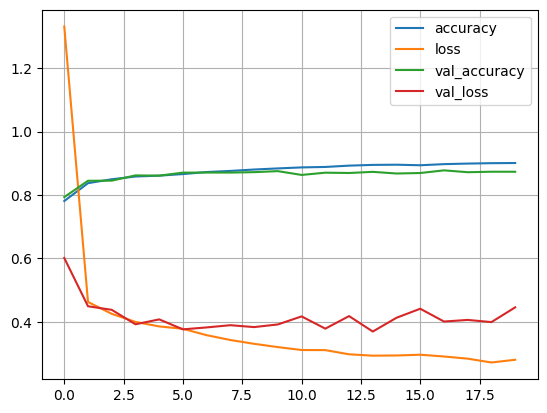

In [ ]:
#將訓練後的資料畫成圖
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()
#X軸:epochs 進行幾個回合
#Y軸:loss與accuracy 值

In [ ]:
# Evaluate(評估)
print(x_test.shape)
model.evaluate(x_test, y_test) #test資料有102筆，10000/32=312.多，所以分313批評估，平均accuracy: 0.8668

(10000, 28, 28)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8638 - loss: 0.4573


[0.4557127356529236, 0.8651000261306763]

In [ ]:
# Predict
y_proba = model.predict(x_test)
y_proba[:10].round(2) #顯示前10筆各類別預測機率

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.35, 0.  , 0.1 , 0.  , 0.03, 0.  , 0.51, 0.  , 0.01, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(y_proba, axis=1) #查找陣列中最大值的索引，axis=1：要求np.argmax在y_proba的每一列（axis=1）中查找最大值。
cm = confusion_matrix(y_test, y_pred)
cm

array([[908,   2,  15,  29,   2,   2,  37,   0,   5,   0],
       [  8, 966,   1,  19,   3,   0,   3,   0,   0,   0],
       [ 33,   2, 837,  10,  63,   0,  52,   0,   3,   0],
       [ 35,   6,  15, 909,  15,   1,  13,   0,   6,   0],
       [  0,   1, 156,  57, 722,   0,  61,   0,   3,   0],
       [  0,   0,   1,   1,   0, 865,   0,  84,   7,  42],
       [225,   3,  93,  36,  61,   0, 571,   0,  11,   0],
       [  0,   0,   0,   0,   0,   2,   0, 985,   2,  11],
       [  7,   1,   3,   5,   3,   0,  15,   3, 963,   0],
       [  1,   0,   0,   0,   0,   1,   1,  72,   0, 925]])